# Dimensionality Reduction on the Wine dataset

Accuracy using PCA: 97.22%


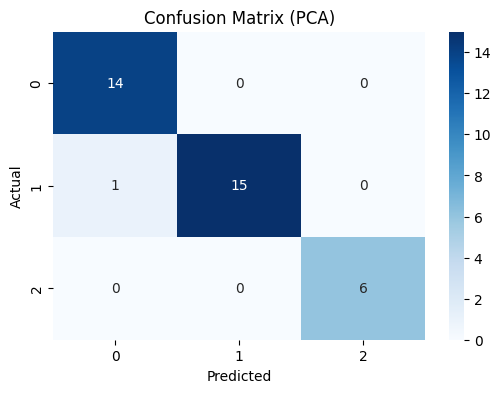

/tmp/ipykernel_2395/3143450437.py:86: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


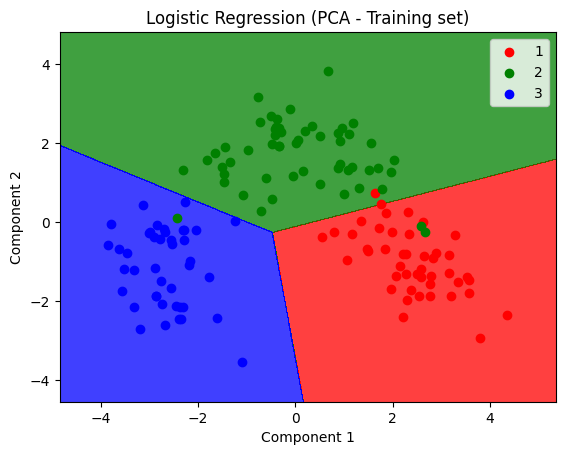

/tmp/ipykernel_2395/3143450437.py:86: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


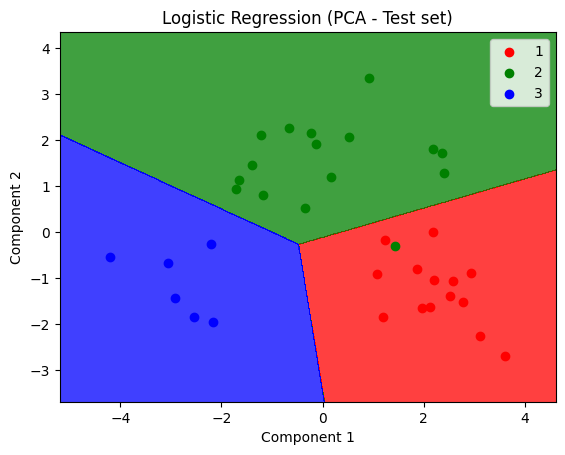

Accuracy using LDA: 100.00%


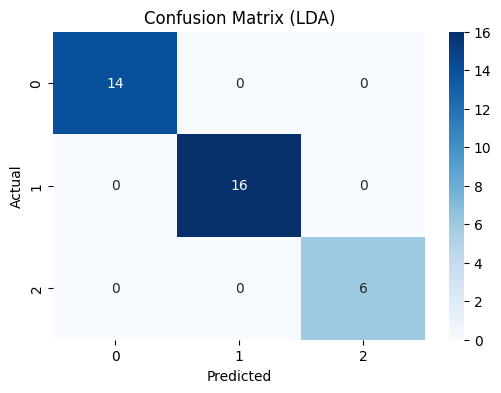

/tmp/ipykernel_2395/3143450437.py:86: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


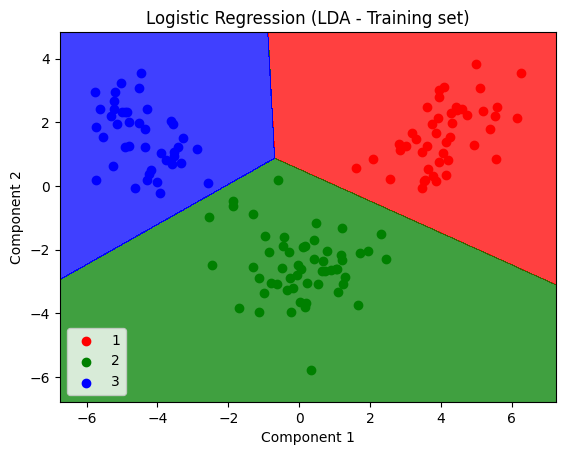

/tmp/ipykernel_2395/3143450437.py:86: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


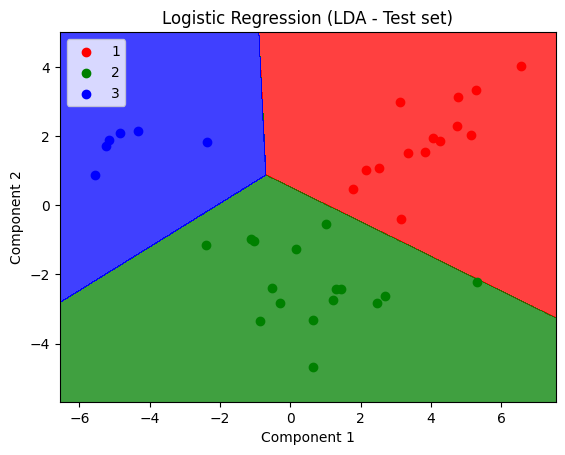

Accuracy using Kernel PCA: 100.00%


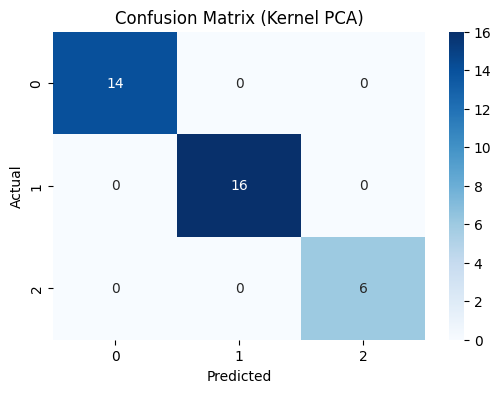

/tmp/ipykernel_2395/3143450437.py:86: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


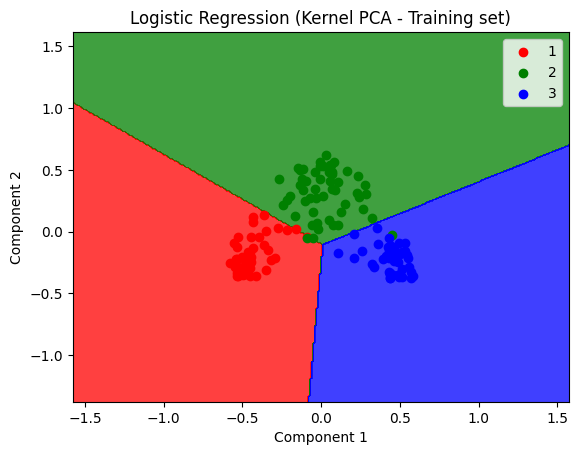

/tmp/ipykernel_2395/3143450437.py:86: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


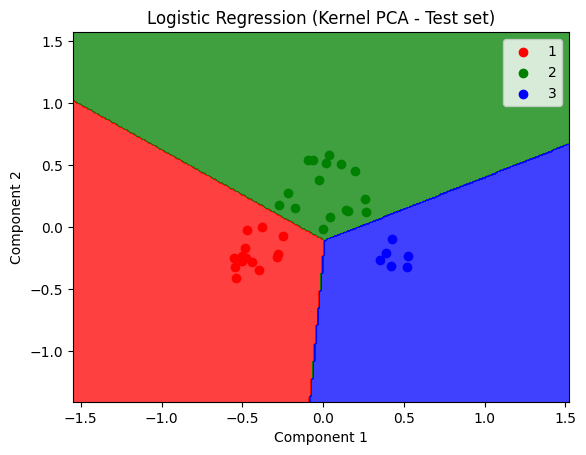

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns

# Create outputs directory if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Import Dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Train/test split
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train_full = sc.fit_transform(X_train_full)
X_test_full = sc.transform(X_test_full)

# Initialize a dictionary to store results
methods = {
    'PCA': PCA(n_components=2),
    'LDA': LDA(n_components=2),
    'Kernel PCA': KernelPCA(n_components=2, kernel='rbf')
}

# Iterate over each dimensionality reduction method
for method_name, method in methods.items():
    # Apply dimensionality reduction
    if method_name == 'LDA':
        X_train = method.fit_transform(X_train_full, y_train)
        X_test = method.transform(X_test_full)
    else:
        X_train = method.fit_transform(X_train_full)
        X_test = method.transform(X_test_full)
    
    # Train Logistic Regression
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    
    # Predict Test set results
    y_pred = classifier.predict(X_test)
    
    # Compute Confusion Matrix and Accuracy
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    # Print accuracy
    print(f'Accuracy using {method_name}: {acc*100:.2f}%')
    
    # Plot Confusion Matrix as heatmap
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({method_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'outputs/confusion_matrix_{method_name}.png')
    plt.show()
    plt.close()
    
    # Function to plot decision regions
    def plot_decision_regions(X_set, y_set, set_description):
        X1, X2 = np.meshgrid(
            np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
            np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
        )
        plt.contourf(
            X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue'))
        )
        plt.xlim(X1.min(), X1.max())
        plt.ylim(X2.min(), X2.max())
        for i, j in enumerate(np.unique(y_set)):
            plt.scatter(
                X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j
            )
        plt.title(f'Logistic Regression ({method_name} - {set_description} set)')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.legend()
        plt.savefig(f'outputs/{method_name}_{set_description}_set.png')
        plt.show()
        plt.close()
    
    # Plot Training Results
    plot_decision_regions(X_train, y_train, 'Training')
    
    # Plot Test Results
    plot_decision_regions(X_test, y_test, 'Test')

